### Student Information
Name:李軒毅

Student ID:107034011

GitHub ID:Kev107034011

Kaggle name: Kev_Lee

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

# Part 1. Take Home Exercises

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
### Begin Assignment Here

import pandas as pd

### training data
anger_train = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../DM2021-Lab2-master-main/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import nltk

BOW_vectorizer = CountVectorizer(tokenizer=nltk.word_tokenize) 
BOW_vectorizer.fit(train_df['text'])

# extract features
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
feature_names = BOW_vectorizer.get_feature_names()

train_data_BOW_features_array=train_data_BOW_features.toarray()
test_data_BOW_features_array=test_data_BOW_features.toarray()

NameError: name 'train_df' is not defined

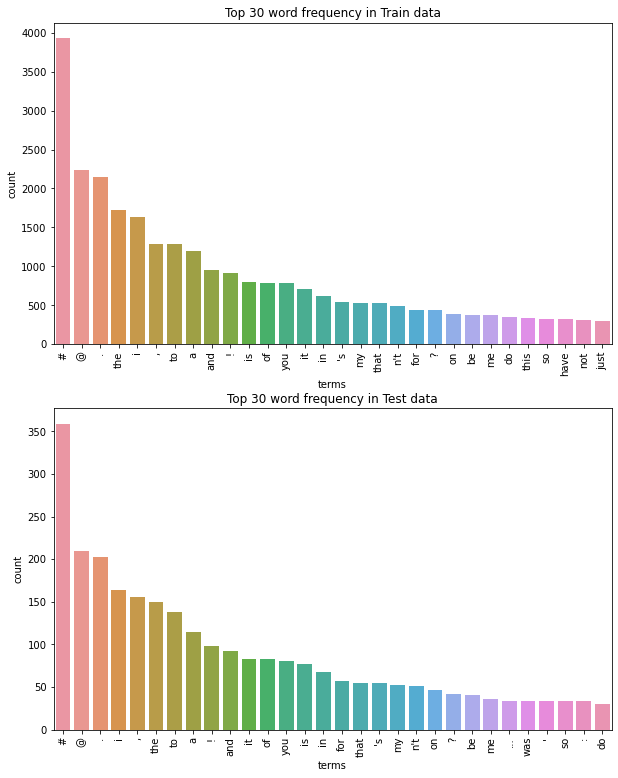

In [3]:
#plot training data and testing data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train_term_count=np.asarray(train_data_BOW_features_array.sum(axis=0))
df_train=pd.DataFrame(zip(train_term_count,feature_names),columns=['count','terms'])
df_train=df_train.sort_values('count',ascending=False)[:30]

test_term_count=np.asarray(test_data_BOW_features_array.sum(axis=0))
df_test=pd.DataFrame(zip(test_term_count,feature_names),columns=['count','terms'])
df_test=df_test.sort_values('count',ascending=False)[:30]

fig, axs = plt.subplots(2, 1, figsize=(10, 13))
axs[0].set_title('Top 30 word frequency in Train data')
axs[1].set_title('Top 30 word frequency in Test data')

g_1=sns.barplot(x=df_train['terms'], y=df_train['count'],ax=axs[0])
g_1.set_xticklabels(df_train['terms'], rotation = 90)
g_2=sns.barplot(x=df_test['terms'], y=df_test['count'],ax=axs[1])
g_2.set_xticklabels(df_test['terms'], rotation = 90);

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [4]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [5]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)
tf_idf_train = vectorizer.fit_transform(train_df['text'])

# check dimension
print(tf_idf_train.shape)

# observe some feature names
feature_names_1000 = vectorizer.get_feature_names()
feature_names_1000[100:110]

(3613, 1000)


['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday', 'be']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [8]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'fear', 'joy', 'sadness', 'joy',
       'sadness', 'sadness', 'sadness'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [9]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [10]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

       anger       0.97      1.00      0.98       857
        fear       0.98      1.00      0.99      1147
         joy       1.00      1.00      1.00       823
     sadness       1.00      0.94      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.98      0.99      3613
weighted avg       0.99      0.99      0.99      3613



In [11]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [12]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [13]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

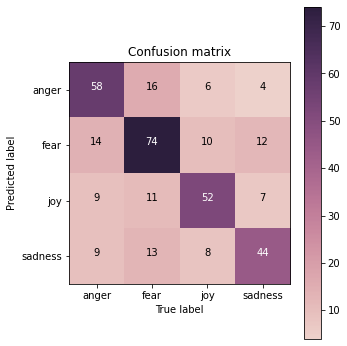

In [14]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

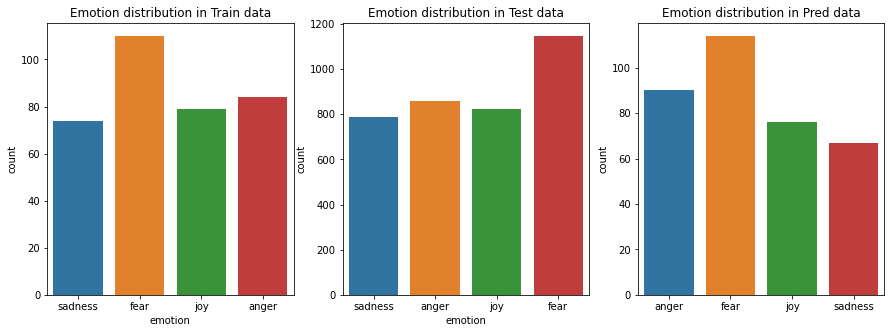

In [15]:
# Emotion distribution
fig, axs = plt.subplots(1, 3,figsize=(15,5))
axs[0].set_title('Emotion distribution in Train data')
axs[1].set_title('Emotion distribution in Test data')
axs[2].set_title('Emotion distribution in Pred data')
sns.countplot(x=y_test,ax=axs[0])
sns.countplot(x=y_train,ax=axs[1])
sns.countplot(x=y_test_pred,ax=axs[2]);

### Answer here
1. Fear is more distinguishable and is more balanced in wrong predictions.
2. Sadness tends to be predicted as Fear, and gather the lowest F1-Score out of the rest.
3. We get more data labeled as Fear in Train,Test,Pred dataset.
4. In wrong predictions, more data are predicted as Fear.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [16]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred_NB=clf.predict(X_train)
y_test_pred_NB=clf.predict(X_test)

In [17]:
## precision, recall, f1-score for train data
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred_NB))

              precision    recall  f1-score   support

       anger       0.76      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.86      0.79      0.82       823
     sadness       0.76      0.75      0.75       786

    accuracy                           0.79      3613
   macro avg       0.79      0.78      0.79      3613
weighted avg       0.79      0.79      0.79      3613



In [18]:
## precision, recall, f1-score for test data
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
In Decision Tree model, we can see that F1-Score is incredibly high in train data. By contrast, F1-Score is a lot lower in test data. In terms of that, we can conisder the model is quite over-fitting.

As for NB model, though we gather lower F1-Score in train data compared to Decision Tree model, F1-Score in test data is actually better, and the gap between performance of train and test data predictions are much smaller. It seems that NB model is not as over-fitting as the previous one.

Besides current outcome, if we want to make some improvement, we can either adjust the models' hyperparameters or ponder on some other methods for data pre-processing, such as using different tokenizer or different way to vectorize our text data.

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:

    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [19]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [20]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    #return keras.utils.to_categorical(enc)
    # for newer version of keras
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3459    sadness
317       anger
3512    sadness
2571        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [21]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [22]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [23]:
y_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [24]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\Kevin\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


113/113 [==============================] - 7s 25ms/step - loss: 1.3311 - accuracy: 0.3507 - val_loss: 1.2920 - val_accuracy: 0.4150
Epoch 2/25
113/113 [==============================] - 2s 20ms/step - loss: 1.0013 - accuracy: 0.6374 - val_loss: 0.9707 - val_accuracy: 0.6513
Epoch 3/25
113/113 [==============================] - 4s 32ms/step - loss: 0.5849 - accuracy: 0.7899 - val_loss: 0.8346 - val_accuracy: 0.6888
Epoch 4/25
113/113 [==============================] - 2s 16ms/step - loss: 0.4153 - accuracy: 0.8478 - val_loss: 0.8433 - val_accuracy: 0.6830
Epoch 5/25
113/113 [==============================] - 1s 10ms/step - loss: 0.3253 - accuracy: 0.8860 - val_loss: 0.8771 - val_accuracy: 0.6744
Epoch 6/25
113/113 [==============================] - 1s 10ms/step - loss: 0.2638 - accuracy: 0.9142 - val_loss: 0.9357 - val_accuracy: 0.6686
Epoch 7/25
113/113 [==============================] - 2s 19ms/step - loss: 0.2159 - accuracy: 0.9286 - val_loss: 1.0176 - val_accuracy: 0.6715
Epoch 8/25

In [25]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[1.1121096e-01, 8.2637089e-01, 1.2263518e-02, 5.0154690e-02],
       [3.2177871e-01, 1.8829401e-01, 6.8927377e-02, 4.2099994e-01],
       [3.1026420e-06, 9.9999201e-01, 7.9541643e-08, 4.8315396e-06],
       [6.2670700e-02, 2.5475444e-02, 9.0459025e-01, 7.2635557e-03],
       [3.6694239e-06, 5.0350327e-06, 9.9997747e-01, 1.3775815e-05]],
      dtype=float32)

In [26]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'fear', 'joy', 'joy'], dtype=object)

In [27]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [28]:
## precision, recall, f1-score for test data
print(classification_report(y_true=label_decode(label_encoder, y_test), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.65      0.63      0.64        84
        fear       0.69      0.70      0.70       110
         joy       0.77      0.68      0.72        79
     sadness       0.55      0.62      0.58        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.67      0.66      0.66       347



In [29]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.350678,1.331076,0.414986,1.292012
1,1,0.637420,1.001308,0.651297,0.970664
2,2,0.789925,0.584944,0.688761,0.834571
3,3,0.847772,0.415264,0.682997,0.843282
4,4,0.885967,0.325309,0.674352,0.877117
5,5,0.914199,0.263822,0.668588,0.935720
6,6,0.928591,0.215854,0.671470,1.017599
7,7,0.939386,0.183653,0.657061,1.059355
8,8,0.955162,0.153966,0.665706,1.139832
9,9,0.959314,0.132064,0.677233,1.180918


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [9]:
n_list=[50,50,500,500,5000,5000]
name_list=['Binomial','Pairing','Binomial','Pairing','Binomial','Pairing']
insert_list=[ 780,39.5,7521.5,185.5,39945,738.5]

data={'n':n_list,'heap':name_list,'insertion':insert_list}

A=pd.DataFrame(data)

In [10]:
A

,n,heap,insertion
0,50,Binomial,780.0
1,50,Pairing,39.5
2,500,Binomial,7521.5
3,500,Pairing,185.5
4,5000,Binomial,39945.0
5,5000,Pairing,738.5


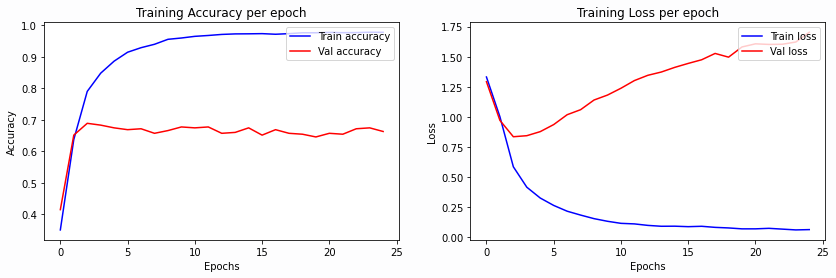

In [30]:
train_acc=training_log['accuracy']
val_acc=training_log['val_accuracy']
loss_train = training_log['loss']
loss_val = training_log['val_loss']
epochs = range(0,25)

fig,axs=plt.subplots(1,2,figsize=(14,4))
fig.set_facecolor('xkcd:pale gray')

axs[0].plot(epochs, train_acc,'b', label='Train accuracy')
axs[0].plot(epochs, val_acc, 'r', label='Val accuracy')
axs[0].set_title('Training Accuracy per epoch')
axs[0].set(xlabel='Epochs',ylabel='Accuracy')
axs[0].legend(loc='upper right')

axs[1].plot(epochs, loss_train,'b', label='Train loss')
axs[1].plot(epochs, loss_val, 'r', label='Val loss')
axs[1].set_title('Training Loss per epoch')
axs[1].set(xlabel='Epochs',ylabel='Loss')
axs[1].legend(loc='upper right')
plt.show()

### Anwser Here
The left graph illustrates the accuracy of both train and val data become oscillating after 10 epochs.

Moreover, in the right graph, it is noticeable that the train loss keeps decreasing while the val loss keeps increasing. 

It's clear that the model is overfitting.



---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [31]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [32]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3459,40632,"@TetraVariations I don't need a mask, but I'll...","[@, TetraVariations, I, do, n't, need, a, mask..."
317,10317,@jwolfie_ why you gotta use the dark skin emoj...,"[@, jwolfie_, why, you, got, ta, use, the, dar..."
3512,40685,@littlemore20 I had a nice Italian ice-cream w...,"[@, littlemore20, I, had, a, nice, Italian, ic..."
2571,30567,Bring back the heyday #NominateBunkface,"[Bring, back, the, heyday, #, NominateBunkface]"
2879,40052,2 applications for my dbs and still waiting. B...,"[2, applications, for, my, dbs, and, still, wa..."


In [33]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'TetraVariations', 'I', 'do', "n't", 'need', 'a', 'mask', ',', 'but', 'I', "'ll", 'gladly', 'make', 'a', 'donation', 'to', 'help', 'in', 'ur', 'name', '!', 'Is', 'it', 'Mr.', 'TY', 'Rex', 'or', 'first', 'initial', 'only', '?', '#', 'serious']),
       list(['@', 'jwolfie_', 'why', 'you', 'got', 'ta', 'use', 'the', 'dark', 'skin', 'emoji', '#', 'offended']),
       list(['@', 'littlemore20', 'I', 'had', 'a', 'nice', 'Italian', 'ice-cream', 'whilst', 'resting', 'my', 'tired', 'paws', '.', 'Honey', 'flavoured', ',', 'naturally', '!', '#', 'FurryTails', '#', 'lost', '#', 'Venice', '.'])],
      dtype=object)

In [34]:
#For the Word2Vec initialization, if you get keyword errors, you can change iter to epochs and size to vector_size. 

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
# word2vec_model = Word2Vec(sentences=training_corpus, 
#                           size=vector_dim, window=window_size, 
#                           min_count=min_count, iter=training_iter)
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

In [35]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 5.53362250e-01,  2.53705829e-01, -3.93578559e-02,  3.78578424e-01,
       -3.77533138e-01, -1.11449671e+00,  7.45501578e-01,  1.47039390e+00,
       -6.23133838e-01, -5.42943597e-01, -5.80014765e-01, -4.04008687e-01,
       -4.26155597e-01, -4.98088151e-02, -5.66874444e-03, -6.63828552e-01,
        3.47462714e-01, -8.40568006e-01,  1.88190028e-01, -1.36475694e+00,
        8.92655849e-01,  3.24333131e-01,  1.11238527e+00,  3.47116828e-01,
       -2.07484335e-01, -2.71946758e-01, -4.30662066e-01,  5.16461432e-01,
       -3.12194735e-01,  3.60369712e-01,  3.41218263e-01, -2.18924716e-01,
        4.87715095e-01, -4.82333243e-01, -3.79058272e-01,  2.38429159e-01,
        5.75338542e-01, -6.06372833e-01, -4.29505676e-01, -1.99856833e-01,
        4.08292860e-01,  2.90390581e-01, -3.33826095e-01,  6.77976847e-01,
        7.08580792e-01, -3.33323292e-02, -7.97109246e-01, -1.26665622e-01,
        9.29895639e-01,  3.35834146e-01,  4.89346646e-02, -1.62808925e-01,
       -9.41190112e-04,  

In [36]:
# Get the most similar words
#And for word2vec_model.most_similar, change to word2vec_model.wv.most_similar
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9414999485015869),
 ('Makes', 0.9321522116661072),
 ('free', 0.9203268885612488),
 ('Be', 0.9149371981620789),
 ("'be", 0.9138712882995605),
 ('muchlove', 0.9115868210792542),
 ('blessed', 0.9107590317726135),
 ('plz', 0.9096816182136536),
 ('cats', 0.906987190246582),
 ('bday', 0.9040465354919434)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [37]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [38]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

In [39]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answer here

We can utilize 3 methods below to represent sentences by its vectors:
1. Average of Word2Vec vectors : You can just take the average of all the word vectors in a sentence. This average vector will represent the sentence vector.
2. Average of Word2Vec vectors with TF-IDF : Just take the word vectors and multiply it with their TF-IDF scores. The average will represent the sentence vector.
3. Doc2Vec : Use otehr vectorize methods such as Doc2Vec, and we can just gather vectors for each sentence.


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

### 9.1 Prepare visualizing target
Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [42]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

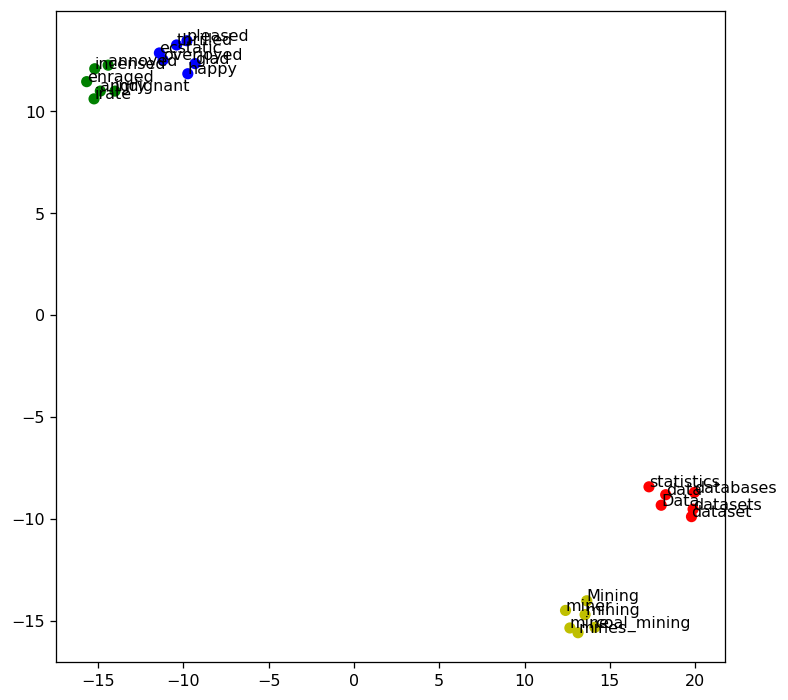

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
#all_word = list(model.vocab.keys())
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')

plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']

sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']

fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated',

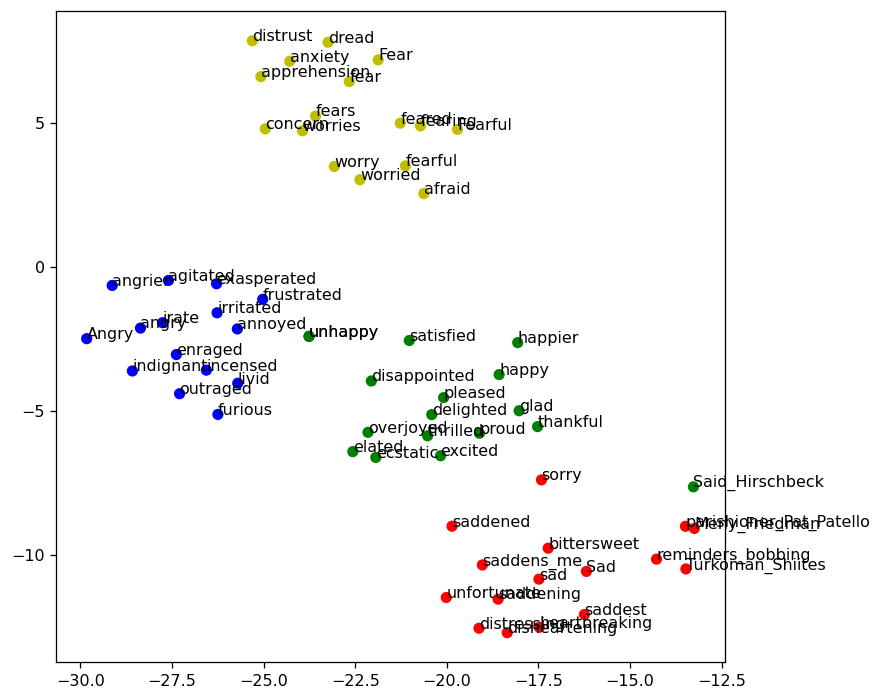

In [45]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]  
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('\nhappy_words: ', happy_words)
print('\nsad_words: ', sad_words)
print('\nfear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)



%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
#all_word = list(model.vocab.keys())
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points',fontsize=10)

plt.show()

# Part 2.  Kaggle Competition Result

Kaggle name: Kev_Lee

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

# Part 3. My Report for this competition (Code provided)

Overall, my work consists of Data Loading, Data Pre-processing, Tokenizing, Vectorizing and Modeling parts.

To start with, I extracted useful data from json format file into dataframe and merge it with pre-labeled emotion result.

Then, I utilized some pre-processing techniques such as lemmentation and subtration of rebundent manually through regular expression. For example, there are many texts begin with "@someName" and I omitted them.

After that, I chose nltk.tokenizer to tokenize text within since it can better figure emmtional expression than default one.

As for vectorization method, I chose tf-idf due to its function to filter out those frequent and rebundant item.

In modeling part, I chose 2 classification method, Naive Bayse and Decision Tree ( I also tried BERT but I thought Colab required extremely long time to execute it which made me give up on that ), and evetually I selected Naive Bayse as its better perfomance on public submission score.

To see detailed procedure, please check my code below. 

It's not executable because I copied them from my Colab section to here, yet you still can see the comment my made to understand what's going on. 

Thanks for reading!

## 1. Connect Google Colab and Load Fundemental  packages

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
import regex as re
from nltk.stem import WordNetLemmatizer
import nltk

## 2. Load Data

In [3]:
df_emotion=pd.read_csv('/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/emotion.csv')

# add this one if you want to see id in decimal format
#df_emotion['id']=df_emotion['tweet_id'].apply(lambda x: int(x,16))
#df_emotion=df_emotion.sort_values(by=['id'])

df_emotion

In [ ]:
df_id=pd.read_csv('/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/data_identification.csv')

# add this one if you want to see id in decimal format
#df_id['id']=df_id['tweet_id'].apply(lambda x: int(x,16))
#df_id=df_id.sort_values(by=['id'])

df_id.head()

In [ ]:
# Extract data we want from json document

import json
id_list=[]
text_list=[]
score_list=[]
with open(r'/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/tweets_DM.json','r') as f:
    into_list=f.readlines()
    for data_json in into_list:
        data=json.loads(data_json)
        score_list.append(data['_score'])
        id_list.append(data['_source']['tweet']['tweet_id'])
        text_list.append(data['_source']['tweet']['text'])
data_tweet={"tweet_id":id_list,"text":text_list,"score":score_list}
df_all=pd.DataFrame(data_tweet)

#df_all['id']=df_all['tweet_id'].apply(lambda x: int(x,16))
#df_all=df_all.sort_values(by=['id'])
df_all.head()

In [ ]:
# Merge the extracted data from json and the label data together

df_all=pd.merge(df_all,df_id,on='tweet_id',how='outer')
df_all= pd.merge(df_all,df_emotion,on='tweet_id',how= 'outer')
df_all.head()                               

In [ ]:
# Save
df_all.to_csv('/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/df_all.csv')

## 3. Data Pre-processing

### Lemmatization AND Substract rebundant words.

In [ ]:
# 移除標點符號: "." , "," , "'" . '"' ，共通多餘符號<LH>和@及其接續的名字(直到遇到空白)
from nltk.corpus import stopwords
import regex as re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
stopwords.words('english')
lemmmatizer=WordNetLemmatizer()
clean_txt=[]

for text in list(df_all['text']):
    text=re.sub('[<LH>"\'.,]','',text)
    text=re.sub('@\\w+ *','',text)
    text=text.lower()
    text = text.split()
    text = [lemmmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    clean_txt.append(text)
df_all['text']=clean_txt

In [ ]:
# Save Data
from google.colab import files
df_all.to_csv('/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/df_all.csv')
df_all.to_csv('df_all.csv')
files.download("df_all.csv")

### Tokenize

In [ ]:
# download needed module for colab

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')

In [ ]:
df_all=pd.read_csv('/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/df_all.csv')
df_all.drop(['Unnamed: 0'],axis=1,inplace=True)
df_all

In [ ]:
# split train and test data by its' identification

df_train = df_all[df_all['identification']=='train']
df_test = df_all[df_all['identification']=='test']

In [ ]:
# drop NA data

df_all_not_na = df_all.dropna(subset=["text"])
df_all_not_na

In [ ]:
# 因為經過前面的前處理後，會有少數的欄位會被完全刪掉，而成為NA值(在此共有19筆)，所以要先把他們去除才可繼續進行

df_train=df_train.dropna(subset=["text"])
df_test_clean=df_test.dropna(subset=['text'])

In [ ]:
# 使用tf-idf值前20000大的feature去tokenize

#vectorizer = TfidfVectorizer(max_features=10000,tokenizer=nltk.word_tokenize)
#tf_idf_all = vectorizer.fit(df_all_not_na['text'])

vectorizer_2 = TfidfVectorizer(max_features=20000,tokenizer=nltk.word_tokenize)
tf_idf_all_2 = vectorizer_2.fit(df_all_not_na['text'])
# check dimension

# observe some feature names
# feature_names_10000 = vectorizer.get_feature_names()
# feature_names_10000[100:110]

In [ ]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = tf_idf_all_2.transform(df_train['text'])
y_train = df_train['emotion']

X_test = tf_idf_all_2.transform(df_test_clean['text'])
y_test = df_test_clean['emotion']

# take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
# Save data

#TODO:記得改地址
# 1: 10000 features
# 2: 20000 features
from scipy import sparse

sparse.save_npz("/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/X_train_2.npz", X_train)
sparse.save_npz("/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/X_test_2.npz", X_test)

## 4. Model

### Load Processed Data

In [ ]:
#TODO:記得改地址
# 1: 10000 features
# 2: 20000 features
from scipy import sparse
X_train = sparse.load_npz("/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/X_train_2.npz")
y_train = df_train['emotion']
X_test = sparse.load_npz("/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/X_test_2.npz")
y_test = df_test_clean['emotion']

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred_NB=clf.predict(X_train)
y_test_pred_NB=clf.predict(X_test)

In [ ]:
## precision, recall, f1-score for train data
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred_NB))

## 5. Submission (Choose NB because it gains the best score in Public Leaderboard)

In [ ]:
y_test_pred_NB=pd.DataFrame(y_test_pred_NB)
y_submit=df_test_clean.copy()
y_submit['emotion']=list(y_test_pred_NB[0])
y_submit.drop(labels=['text','score','identification'],axis=1,inplace=True)
y_submit.rename(columns={"tweet_id": "id"},inplace=True)
y_submit

In [ ]:
del df_test['emotion']
del df_test['score']
del df_test['identification']
df_test

In [ ]:
# 因為經過前處理的text data中，有19個data剩下空白資訊，因此針對那19個資料，給予訓練資料集中佔比最高的情緒，也就是'joy'

add=df_test[df_test['text'].isna()].copy()
del add['text']
add['emotion']='joy'
add.rename(columns={'tweet_id':'id'},inplace=True)
y_submit=pd.concat([y_submit,add])

In [ ]:
y_submit

In [ ]:
# Download data

from google.colab import files
y_submit.to_csv('/content/drive/MyDrive/資料探勘與應用/Kaggle_EnotionRecognition/Data/y_submit_2.csv',index=False)
y_submit.to_csv('y_submit_2.csv',index=False)
files.download("y_submit_2.csv")